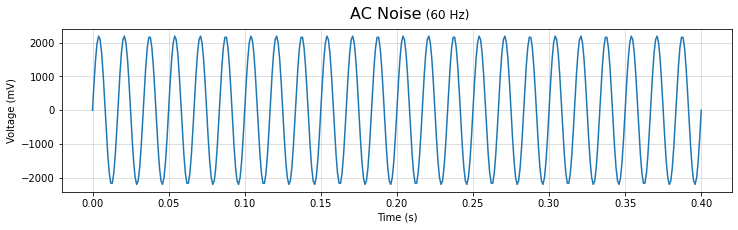

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz

x = np.linspace(start,end,dn)
noi_data = 2200*np.sin(x*math.pi*2*60)  # 교류 전원 노이즈 (60 Hz)
plt.figure(figsize=(12,3))
plt.suptitle('AC Noise',size=16)
plt.title('                          (60 Hz)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,noi_data);

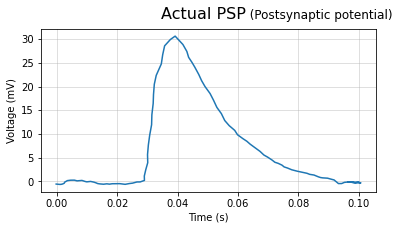

In [2]:
import csv  # psp 가정
f = open("C:/Users/enjdn/Documents/MEG_python/MEG_data_artifi/psp5.csv","rt")
reader = csv.reader(f)

col1 = []
col2 = []
for row in reader:
    col1.append(row[0])
    col2.append(row[1])

del col1[0]
del col2[0]

len(col1)

time = np.array(list(map(float, col1)))
volt = np.array(list(map(float, col2)))
plt.figure(figsize=(6, 3))  # 실제 psp 그래프
plt.suptitle('Actual PSP',size=16)
plt.title('                                                          (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(time,volt);

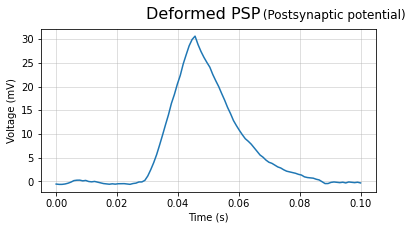

In [3]:
n = 104
x_2 = np.linspace(0,0.1,n)  # scale 조정을 위해 변형된 psp 그래프
plt.figure(figsize=(6, 3))
plt.suptitle('Deformed PSP',size=16)
plt.title('                                                                 (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x_2,volt);

401

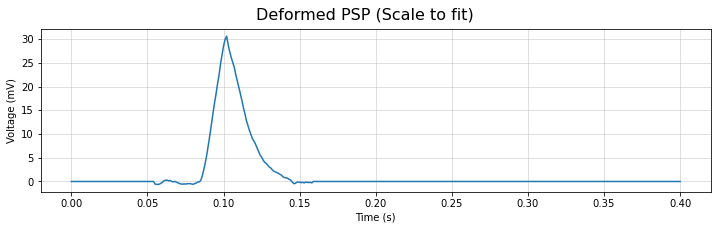

In [4]:
c = np.zeros(shape=(55,), dtype=np.int8)  # signal 0.01 s 로 
volt_1 = np.concatenate((c, volt), axis=None)
d = np.zeros(shape=(242,), dtype=np.int8)
volt_2 = np.concatenate((volt_1, d), axis=None)

plt.figure(figsize=(12,3))
plt.suptitle('Deformed PSP (Scale to fit)',size=16)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x,volt_2);  # noise와 scale 맞추기
len(volt_2)

In [5]:
# Biot-Savart Law에 따른 signal 자기장

n,m = 9, 9
sensor_array = np.zeros((n,m), dtype = np.ndarray)  # n X m 채널 sensor의 위치
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # [0,0]으로 위치 세팅 & 채널 간격 4cm

sig = np.array([1,1,0])  # signal의 방향 및 크기 (4 cm 로 가정)
noi_1 = np.array([0,1000,4])  # noise의 위치(1 m로 가정)  


dl_vec_sig = sig/np.linalg.norm(sig)  # signal의 단위 벡터

R_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R_sig[i,j] = np.linalg.norm(sensor_array[i,j])

a_R_sig = sensor_array/R_sig  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 signal 벡터의 크기
for i in range(n):
    for j in range(m):
        H_vec_sig[i,j] = np.cross(dl_vec_sig,a_R_sig[i,j])

H_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) 
for i in range(n):
    for j in range(m):
        g_noise = np.random.randn(401)  # 가우시안 noise 생성 
        H_sig[i,j]  = (float(H_vec_sig[i,j][2])/((4*np.pi)*float(R_sig[i,j])**2))*volt_2 + g_noise*0.001

        
R_noi_1 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 noise가 떨어진 거리 R (1 m)
for i in range(n):
    for j in range(m):
        R_noi_1[i,j] = np.linalg.norm(sensor_array[i,j]-noi_1)

H_noi_1 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 noise의 자기장 (with Biot-Savart Law) (1 m)
for i in range(n):
    for j in range(m):
        H_noi_1[i,j] = noi_data/(2*np.pi*R_noi_1[i,j])

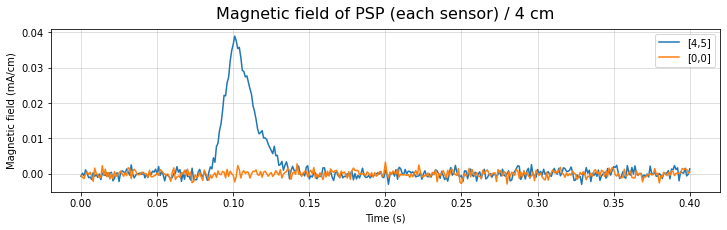

In [6]:
plt.figure(figsize=(12, 3)) # Sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) + 각 채널에 가우시안 noise 
plt.title('Magnetic field of PSP (each sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,H_sig[4,5], label='[4,5]')  # Sensor[4,5]에서 signal
plt.plot(x,H_sig[0,0], label='[0,0]')  # Sensor[0,0]에서 signal
plt.legend();

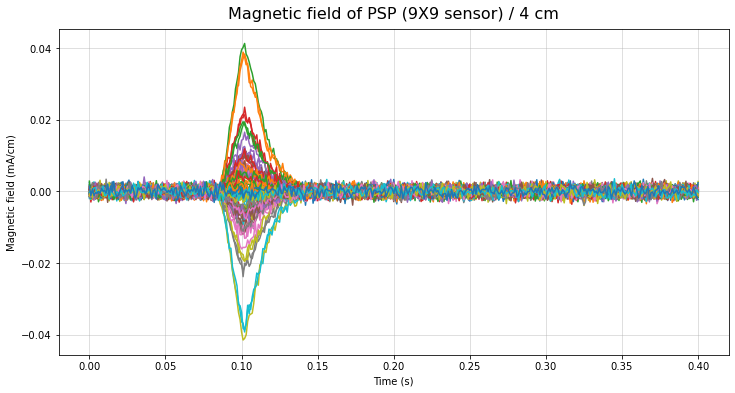

In [7]:
plt.figure(figsize=(12, 6)) # 9 X 9 Sensor에 들어오는 최종 signal의 자기장
plt.title('Magnetic field of PSP (9X9 sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_sig[i,j])

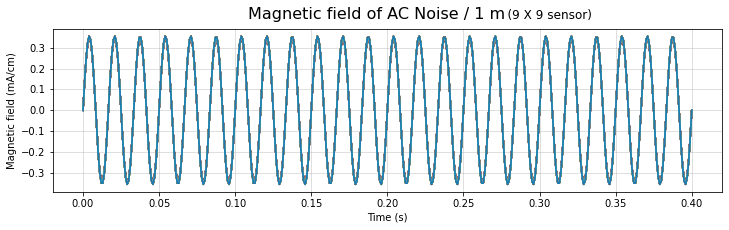

In [8]:
plt.figure(figsize=(12, 3)) 
plt.suptitle('Magnetic field of AC Noise / 1 m',size=16)
plt.title('                                                                                    (9 X 9 sensor)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_noi_1[i,j])

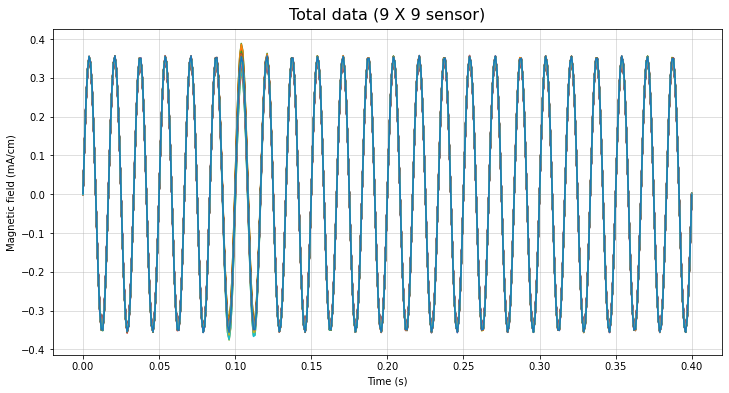

In [9]:
plt.figure(figsize=(12, 6))  # 각각의 sensor 에서 받아들인 총 데이터  (1 m)
plt.title('Total data (9 X 9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x, H_sig[i,j] + H_noi_1[i,j])

In [10]:
H_all_f_1 = []  # 각각의 sensor 에서 받아들인 총 신호  (1 m)
for i in range(n):
    for j in range(m):
        H_all_f_1.append(list(H_sig[i,j] + H_noi_1[i,j]))
len(H_all_f_1)

81

In [11]:
import pandas as pd

# frame = pd.DataFrame(H_all_f)

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz
x = np.linspace(start,end,dn)

indexName_col = x  # Data frame에 각 센서별 데이터 기록
indexName = []
for i in range(n*m):
    indexName.append('Sensor_'+str(i+1))
df = pd.DataFrame(H_all_f_1, columns = indexName_col,index = indexName)
df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400
Sensor_1,-0.000397,0.125865,0.234587,0.311776,0.344484,0.327539,0.265990,0.165417,0.041114,-0.084037,...,0.085870,-0.042926,-0.165853,-0.265211,-0.326173,-0.342527,-0.310457,-0.234581,-0.126646,0.000597
Sensor_2,-0.000327,0.128058,0.235400,0.313665,0.344982,0.328876,0.267523,0.166839,0.043403,-0.086375,...,0.085805,-0.044088,-0.167545,-0.268496,-0.330632,-0.344021,-0.311956,-0.236264,-0.128053,0.001006
Sensor_3,0.000919,0.127789,0.238299,0.313148,0.346470,0.329673,0.266456,0.167430,0.044079,-0.086206,...,0.087217,-0.043065,-0.166721,-0.266448,-0.331655,-0.346477,-0.314967,-0.237093,-0.127635,0.000667
Sensor_4,-0.000603,0.128151,0.239685,0.316890,0.348141,0.333146,0.268978,0.168261,0.043757,-0.087635,...,0.086709,-0.044395,-0.167919,-0.268332,-0.331862,-0.346948,-0.317038,-0.237901,-0.129067,0.000723
Sensor_5,0.000312,0.128235,0.240610,0.315976,0.348449,0.333870,0.269702,0.167791,0.043215,-0.088487,...,0.088935,-0.042265,-0.169435,-0.268997,-0.332067,-0.350796,-0.316197,-0.241110,-0.129050,-0.000775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sensor_77,-0.001181,0.129664,0.238629,0.316230,0.348124,0.334102,0.270169,0.169443,0.043540,-0.086801,...,0.087116,-0.043118,-0.168671,-0.269143,-0.332379,-0.349787,-0.315514,-0.239236,-0.129931,-0.000789
Sensor_78,0.000225,0.128437,0.240386,0.317816,0.348985,0.332694,0.273359,0.169931,0.045351,-0.087078,...,0.087822,-0.043266,-0.169277,-0.271947,-0.334567,-0.351302,-0.318936,-0.240725,-0.129042,0.000304
Sensor_79,-0.001217,0.130672,0.239892,0.318789,0.352005,0.335889,0.272317,0.169917,0.044754,-0.088885,...,0.089230,-0.045015,-0.168926,-0.272408,-0.336038,-0.352217,-0.321072,-0.242677,-0.129468,-0.001207
Sensor_80,-0.000134,0.130112,0.242645,0.321585,0.354813,0.336526,0.272882,0.170505,0.044767,-0.086564,...,0.087685,-0.044634,-0.171831,-0.272444,-0.338661,-0.354955,-0.321329,-0.243747,-0.129945,-0.000236


In [12]:
from sklearn.preprocessing import StandardScaler
for i in range(401):
    indexName_col[i] = indexName_col[i]
time = indexName_col

Sensor_x = df.loc[:,time].values
    
x_std = StandardScaler().fit_transform(Sensor_x.T)
x_std.shape

(401, 81)

In [13]:
time_f = x_std.T
covariance_matrix = np.cov(time_f)
# np.set_printoptions(threshold=np.inf,linewidth=np.inf)  # '...' 생략 없이 출력
covariance_matrix.shape

(81, 81)

In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
# 주성분별 데이터를 설명하는 정도 (10000% 기준)

print('PC1 = ',round(float(eig_vals[0]/sum(eig_vals))*10000,2),'%')
print('PC2 = ',round(float(eig_vals[1]/sum(eig_vals))*10000,2),'%')
print('PC3 = ',round(float(eig_vals[2]/sum(eig_vals))*10000,2),'%')
print('PC4 = ',round(float(eig_vals[3]/sum(eig_vals))*10000,2),'%')

PC1 =  9998.83 %
PC2 =  1.02 %
PC3 =  0.0 %
PC4 =  0.0 %


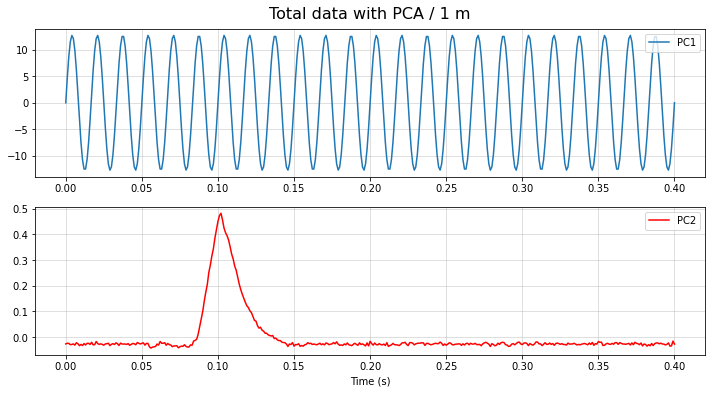

In [16]:
plt.figure(figsize=(12,6)) 
plt.subplot(2,1,1)
plt.title('Total data with PCA / 1 m',size=16, pad=10)
plt.grid(which='both',axis='both',alpha=0.5)
x_pc1 = x_std.dot(eig_vecs.T[0])
plt.plot(time,x_pc1.T,label='PC1')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.grid(which='both',axis='both',alpha=0.5)
x_pc2 = x_std.dot(eig_vecs.T[1])
plt.plot(time,x_pc2.T, color='red',label='PC2')
plt.legend(loc='upper right');

In [17]:
eig_vals[0]/sum(eig_vals)

0.9998825994433952

In [18]:
eig_vals

array([8.11929668e+01, 8.25607633e-03, 3.26153986e-05, 3.12355406e-05,
       3.08546121e-05, 3.01335420e-05, 2.94970947e-05, 2.82788943e-05,
       2.78569881e-05, 2.70920262e-05, 2.63868007e-05, 2.62179164e-05,
       2.54435033e-05, 2.49319072e-05, 2.47455212e-05, 2.43936742e-05,
       2.40814927e-05, 2.37197358e-05, 2.35575109e-05, 2.23341104e-05,
       2.21832272e-05, 2.17927765e-05, 2.14224423e-05, 2.09662251e-05,
       2.05681921e-05, 2.01834505e-05, 1.95486719e-05, 5.62197249e-06,
       5.75357593e-06, 1.91584945e-05, 1.90439017e-05, 6.10413948e-06,
       6.28662847e-06, 1.87626999e-05, 1.83308353e-05, 1.82557443e-05,
       6.63851211e-06, 6.71194479e-06, 6.83652558e-06, 1.75895694e-05,
       1.73893995e-05, 1.71177536e-05, 1.69564740e-05, 7.21912762e-06,
       7.29594672e-06, 1.65043057e-05, 7.63503712e-06, 1.61315933e-05,
       1.58725186e-05, 7.83535977e-06, 7.97111716e-06, 1.55923102e-05,
       8.33885509e-06, 8.55126073e-06, 8.65080410e-06, 1.51448127e-05,
      